<a href="https://colab.research.google.com/github/coco-in-bluemoon/three-minute-deep-learning-keras/blob/main/notebook/chapter4_1_cnn_mnist_cl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
from keras import layers, losses, models

In [3]:
class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super(CNN, self).__init__()

        self.add(
            layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape)
        )
        self.add(
            layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')
        )
        self.add(
            layers.MaxPooling2D(pool_size=(2, 2))
        )
        self.add(
            layers.Dropout(0.25)
        )
        self.add(
            layers.Flatten()
        )
        self.add(
            layers.Dense(128, activation='relu')
        )
        self.add(
            layers.Dropout(0.5)
        )
        self.add(
            layers.Dense(num_classes, activation='softmax')
        )

        self.compile(
            optimizer='rmsprop',
            loss=losses.categorical_crossentropy,
            metrics=['acc']
        )

In [4]:
import keras
from keras import datasets
from keras.utils import np_utils

In [5]:
class Data:
    def __init__(self):
        (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

        Y_train = np_utils.to_categorical(y_train)
        Y_test  = np_utils.to_categorical(y_test)

        img_rows, img_cols = X_train.shape[1:]

        if keras.backend.image_data_format() == 'channels_first':
            X_train = X_train.reshape(-1, 1, img_rows, img_cols)
            X_test = X_test.reshape(-1, 1, img_rows, img_cols)

            input_shape = (1, img_rows, img_cols)
        else:
            X_train = X_train.reshape(-1, img_rows, img_cols, 1)
            X_test = X_test.reshape(-1, img_rows, img_cols, 1)

            input_shape = (img_rows, img_cols, 1)

        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')

        X_train /= 255.0
        X_test /= 255.0

        self.input_shape = input_shape
        self.num_classes = 10
        self.x_train, self.y_train = X_train, Y_train
        self.x_test, self.y_test = X_test, Y_test

In [6]:
import matplotlib.pyplot as plt

In [7]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train, Test'], loc=0)

In [8]:

def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train, Test'], loc=0)

In [9]:
def main():
    data = Data()
    model = CNN(data.input_shape, data.num_classes)
    history = model.fit(data.x_train, data.y_train, epochs=10, batch_size=128, validation_split=0.2)

    score = model.evaluate(data.x_test, data.y_test)
    print(f'Test Loss: {score[0]:.2f}\nTest Accuracy: {score[1]:.2f}')

    plot_loss(history)
    plt.show()

    plot_acc(history)
    plt.show()

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2524 - acc: 0.9228 - val_loss: 0.0659 - val_acc: 0.9808
Epoch 2/10
375/375 [==============================] - 2s 7ms/step - loss: 0.0862 - acc: 0.9741 - val_loss: 0.0492 - val_acc: 0.9852
Epoch 3/10
375/375 [==============================] - 2s 7ms/step - loss: 0.0672 - acc: 0.9802 - val_loss: 0.0429 - val_acc: 0.9872
Epoch 4/10
375/375 [==============================] - 2s 7ms/step - loss: 0.0552 - acc: 0.9838 - val_loss: 0.0548 - val_acc: 0.9838
Epoch 5/10
375/375 [==============================] - 2s 7ms/step - loss: 0.0507 - acc: 0.9848 - val_loss: 0.0413 - val_acc: 0.9883
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0450 - acc: 0.9873 - val_loss: 0.0413 - val_acc: 0.9880
Epoch 7/10
375/375 [==============================] - 2s 7ms/step - loss: 0.0416 - acc: 0.9876 - val_loss: 0.0427 - val_acc: 0.9889
Epoch 8/10


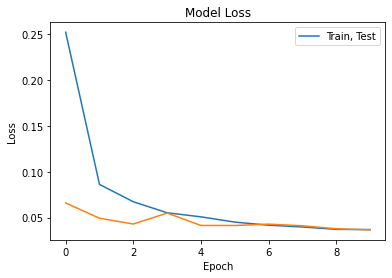

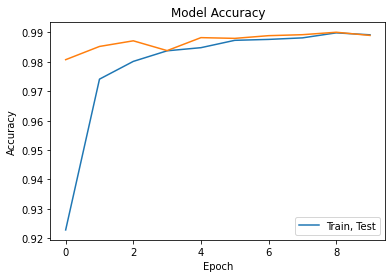

In [10]:
main()